In [1]:
# Step 1: Import all the Python libraries we need

import sqlite3        # Built-in library to work with SQLite databases
import pandas as pd   # For working with tabular data (DataFrames)
import matplotlib.pyplot as plt  # For creating charts in Python

# This line makes charts show inside the Jupyter Notebook
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Step 2: Connect to (or create) the SQLite database file

# This will create 'sales_data.db' file in the current folder if it doesn't exist
db_name = "sales_data.db"
conn = sqlite3.connect(db_name)

# We will use a cursor to execute SQL commands
cursor = conn.cursor()

print(f"Connected to database: {db_name}")


Connected to database: sales_data.db


In [3]:
# Step 3: Create the 'sales' table if it does not already exist

create_table_query = """
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
"""

# Execute the SQL command
cursor.execute(create_table_query)

# Save (commit) the changes to the database
conn.commit()

print("Table 'sales' is ready (created if it did not exist).")


Table 'sales' is ready (created if it did not exist).


In [4]:
# Step 4: Insert sample data into the 'sales' table

# First, let's clear any existing data so we don't duplicate rows if we re-run this cell
delete_query = "DELETE FROM sales;"
cursor.execute(delete_query)
conn.commit()

# Now let's prepare some sample records to insert
sample_sales_data = [
    ("2025-11-20", "Apples", 10, 30.0),
    ("2025-11-20", "Bananas", 5, 10.0),
    ("2025-11-21", "Oranges", 8, 25.0),
    ("2025-11-21", "Apples", 7, 30.0),
    ("2025-11-22", "Bananas", 12, 10.0),
    ("2025-11-22", "Oranges", 4, 25.0),
    ("2025-11-23", "Apples", 5, 30.0),
    ("2025-11-23", "Bananas", 3, 10.0),
    ("2025-11-23", "Oranges", 6, 25.0),
]

insert_query = """
INSERT INTO sales (date, product, quantity, price)
VALUES (?, ?, ?, ?);
"""

# Insert all rows at once using executemany
cursor.executemany(insert_query, sample_sales_data)

# Save the changes
conn.commit()

print("Sample data inserted into 'sales' table successfully.")


Sample data inserted into 'sales' table successfully.


In [5]:
# Step 5: Check what data is present in the 'sales' table

check_query = "SELECT * FROM sales;"

# Using pandas to read the SQL query result into a DataFrame
sales_raw_df = pd.read_sql_query(check_query, conn)

print("Raw data from 'sales' table:")
print(sales_raw_df)


Raw data from 'sales' table:
   id        date  product  quantity  price
0   1  2025-11-20   Apples        10   30.0
1   2  2025-11-20  Bananas         5   10.0
2   3  2025-11-21  Oranges         8   25.0
3   4  2025-11-21   Apples         7   30.0
4   5  2025-11-22  Bananas        12   10.0
5   6  2025-11-22  Oranges         4   25.0
6   7  2025-11-23   Apples         5   30.0
7   8  2025-11-23  Bananas         3   10.0
8   9  2025-11-23  Oranges         6   25.0


In [6]:
# Step 6: Run SQL query to get total quantity and revenue per product

summary_query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

sales_summary_df = pd.read_sql_query(summary_query, conn)

print("Sales summary by product:")
print(sales_summary_df)


Sales summary by product:
   product  total_qty  revenue
0   Apples         22    660.0
1  Oranges         18    450.0
2  Bananas         20    200.0


In [7]:
# Step 7: Print a more readable summary for each product

print("---- Detailed Sales Summary ----")
for index, row in sales_summary_df.iterrows():
    product = row["product"]
    total_qty = row["total_qty"]
    revenue = row["revenue"]
    print(f"Product: {product} | Total Quantity Sold: {total_qty} | Total Revenue: ₹{revenue:.2f}")


---- Detailed Sales Summary ----
Product: Apples | Total Quantity Sold: 22 | Total Revenue: ₹660.00
Product: Oranges | Total Quantity Sold: 18 | Total Revenue: ₹450.00
Product: Bananas | Total Quantity Sold: 20 | Total Revenue: ₹200.00


<Figure size 576x360 with 0 Axes>

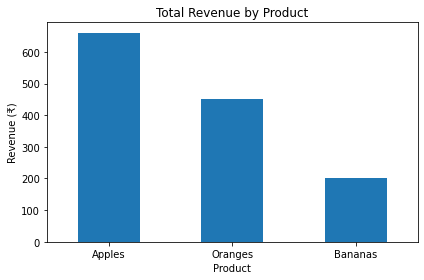

In [8]:
# Step 8: Plot a bar chart of revenue by product

# Create a figure and axis (optional, but good practice)
plt.figure(figsize=(8, 5))

# Use the DataFrame's built-in plot function
sales_summary_df.plot(
    kind="bar",
    x="product",
    y="revenue",
    legend=False
)

# Add chart title and axis labels
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=0)

# Adjust layout to avoid cut-off labels
plt.tight_layout()

# Show the plot
plt.show()


Chart saved as: sales_revenue_chart.png


<Figure size 576x360 with 0 Axes>

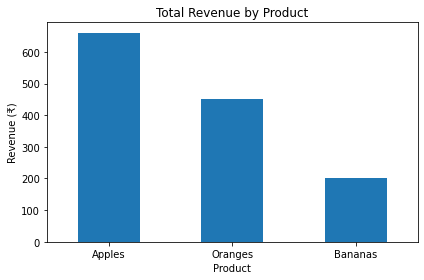

In [10]:
# Step 9 (Optional): Save the revenue chart as a PNG file

plt.figure(figsize=(8, 5))
sales_summary_df.plot(
    kind="bar",
    x="product",
    y="revenue",
    legend=False
)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=0)
plt.tight_layout()

# Save the figure to a PNG file
chart_filename = "sales_revenue_chart.png"
plt.savefig(chart_filename)

print(f"Chart saved as: {chart_filename}")


In [11]:
# Step 10: Close the database connection

conn.close()
print("Database connection closed.")


Database connection closed.
